In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [26]:
df = pd.read_csv('./datasets/vgsales_clean.csv')
df.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [27]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [28]:
df = df.dropna()
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [29]:
from sklearn.preprocessing import LabelEncoder

codificador_Label = {}
for column in ['Platform', 'Genre', 'Publisher']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    codificador_Label[column] = le

In [30]:
features = ['Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
targets = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

In [31]:
X = df[features].values
y = df[targets].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\felip\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


***Testar cada configuracao ---> + ou - 6 min pra carregar :c***

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [35]:
def funcTreinamento(taxa_aprendizado, tam_amostra, epocas, funcao_de_ativacao):

    modelo = Sequential()
  # modelo.add(Dense(Numero_de_Neuronios, funcao_de_ativacao, formato de entrada da rede))
    modelo.add(Dense(128, activation=funcao_de_ativacao, input_shape=(X_train.shape[1],)))
    modelo.add(Dense(64, activation=funcao_de_ativacao))
    modelo.add(Dense(32, activation=funcao_de_ativacao))
    modelo.add(Dense(4))

    otimizador = Adam(learning_rate=taxa_aprendizado)
    modelo.compile(optimizer=otimizador, loss='mse', metrics=['mae'])

    hitorico = modelo.fit(X_train, y_train, epochs=epocas, batch_size=tam_amostra,
                        validation_split=0.2, verbose=1)

    loss, mae = modelo.evaluate(X_test, y_test, verbose=0)
    return mae, hitorico

configuracoes = [
    {'taxa_aprendizado': 0.01, 'tam_amostra': 32, 'epocas': 50, 'funcao_de_ativacao': 'relu'},
    {'taxa_aprendizado': 0.001, 'tam_amostra': 64, 'epocas': 100, 'funcao_de_ativacao': 'relu'},
    {'taxa_aprendizado': 0.005, 'tam_amostra': 32, 'epocas': 50, 'funcao_de_ativacao': 'tanh'},
    {'taxa_aprendizado': 0.001, 'tam_amostra': 64, 'epocas': 100, 'funcao_de_ativacao': 'tanh'}
]

resultado = []
print('Configuracao: Taxa de aprendizado, Tamanho da Amostra, Epocas, Funcao de ativacao => MAE(Media de Erros das previsoes de vendas)')
for config in configuracoes:
    mae, hitorico = funcTreinamento(config['taxa_aprendizado'], config['tam_amostra'],
                                         config['epocas'], config['funcao_de_ativacao'])
    resultado.append((config, mae))
    print(f"Configuracao: {config} >>> MAE: {mae:.4f}")
    print("=" * 100)

for config, mae in resultado:
    print(f"Configuracao: {config} >>> MAE: {mae:.4f}")
    print("=" * 100)


Configuracao: Taxa de aprendizado, Tamanho da Amostra, Epocas, Funcao de ativacao => MAE(Media de Erros das previsoes de vendas)
Epoch 1/50


C:\Users\felip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


332/332 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0459 - mae: 0.0798 - val_loss: 0.1042 - val_mae: 0.1081
Epoch 2/50
332/332 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0377 - mae: 0.0743 - val_loss: 0.0774 - val_mae: 0.0748
Epoch 3/50
332/332 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0307 - mae: 0.0670 - val_loss: 0.0309 - val_mae: 0.0612
Epoch 4/50
332/332 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0289 - mae: 0.0651 - val_loss: 0.0191 - val_mae: 0.0439
Epoch 5/50
332/332 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0113 - mae: 0.0429 - val_loss: 0.0941 - val_mae: 0.0643
Epoch 6/50
332/332 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0215 - mae: 0.0543 - val_loss: 0.0312 - val_mae: 0.0769
Epoch 7/50
332/332 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0122 - mae: 0.0497 - val_loss: 0.0181 - val_mae: 0.0382
Epoch 8/50
332/332 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0168 - mae: 0.0450 - val_loss: 0.0108 - val_mae: 0.0411
Epoch 9/50
332/332 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0144 

***As funcoes 'relu' tiverem os melhores resultados, a menor Taxa de erro (MAE) seria o modelo ideal de previsao***

Epoch 1/100
132/166 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0485 - mae: 0.0940Época 101/100 - Erro MAE: 0.0386
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0425 - mae: 0.0869 - val_loss: 0.0090 - val_mae: 0.0386
Epoch 2/100
148/166 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0037 - mae: 0.0295Época 101/100 - Erro MAE: 0.0237
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0036 - mae: 0.0291 - val_loss: 0.0038 - val_mae: 0.0237
Epoch 3/100
165/166 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0016 - mae: 0.0202Época 101/100 - Erro MAE: 0.0228
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0016 - mae: 0.0202 - val_loss: 0.0020 - val_mae: 0.0228
Epoch 4/100
140/166 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0018 - mae: 0.0213Época 101/100 - Erro MAE: 0.0168
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0018 - mae: 0.0211 - val_loss: 0.0011 - val_mae: 0.0168
Epoch 5/100
153/166 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0011 - mae: 0.0163  Época 101/100 - Erro MAE: 0.0153


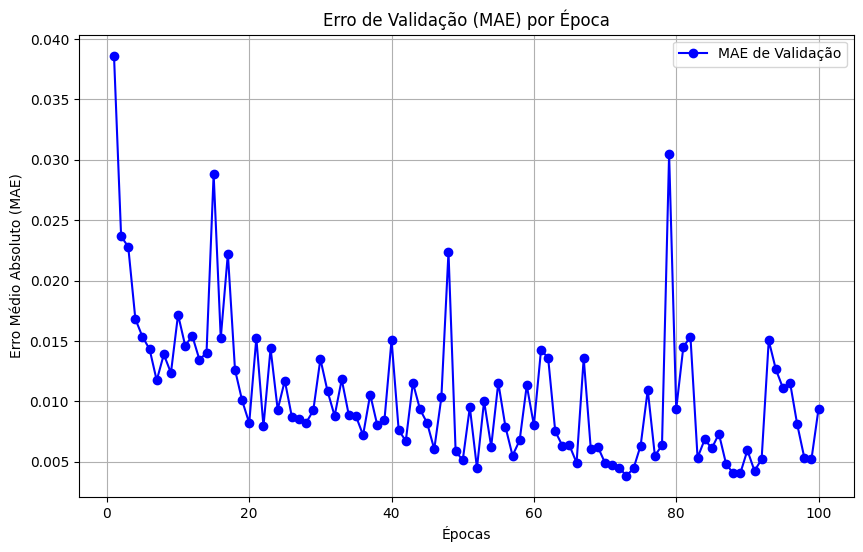

In [36]:
import tensorflow as tf
import matplotlib.pyplot as plt

# definindo com os melhores hiperparametros
taxa_aprendizado = 0.001
tam_lote = 64
epocas = 100
funcao_de_ativacao = 'relu'

modelo = Sequential()
modelo.add(Dense(128, activation=funcao_de_ativacao, input_shape=(X_train.shape[1],)))
modelo.add(Dense(64, activation=funcao_de_ativacao))
modelo.add(Dense(32, activation=funcao_de_ativacao))
modelo.add(Dense(4))

otimizador = Adam(learning_rate=taxa_aprendizado)
modelo.compile(optimizer=otimizador, loss='mse', metrics=['mae'])

vetor_erro = []

# (Receita) monitorar a melhoria do modelo ao longo do treinamento e exibe o erro da epoca atual
class ErrorHistoryCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        mae = logs['val_mae']  # salvar o erro de validacao (MAE)
        vetor_erro.append(mae) # armazena os erros no vetor para mostrar no grafico
        print(f"Época {epocas + 1}/{epocas} - Erro MAE: {mae:.4f}")

historico = modelo.fit(X_train, y_train, epochs=epocas, batch_size=tam_lote,
                    validation_split=0.2, verbose=1, callbacks=[ErrorHistoryCallback()])

plt.figure(figsize=(10, 6))
plt.plot(range(1, epocas + 1), vetor_erro, marker='o', color='b', label='MAE de Validação')
plt.xlabel('Épocas')
plt.ylabel('Erro Médio Absoluto (MAE)')
plt.title('Erro de Validação (MAE) por Época')
plt.legend()
plt.grid(True)
plt.show()

In [37]:
predictions = modelo.predict(X_test)

print("previsoes para os 10 primeiros jogos de cada regiao: ")

for i in range(10):

    print(f"Jogo {i + 1}: ")
    print(f"  NA_Sales (Real): {y_test[i][0]:.2f}, Previsto: {predictions[i][0]:.2f}")
    print(f"  EU_Sales (Real): {y_test[i][1]:.2f}, Previsto: {predictions[i][1]:.2f}")
    print(f"  JP_Sales (Real): {y_test[i][2]:.2f}, Previsto: {predictions[i][2]:.2f}")
    print(f"  Other_Sales (Real): {y_test[i][3]:.2f}, Previsto: {predictions[i][3]:.2f}")
    print("-" * 20)

104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
previsoes para os 10 primeiros jogos de cada regiao: 
Jogo 1: 
  NA_Sales (Real): 0.01, Previsto: 0.00
  EU_Sales (Real): 0.11, Previsto: 0.11
  JP_Sales (Real): 0.00, Previsto: -0.00
  Other_Sales (Real): 0.03, Previsto: 0.03
--------------------
Jogo 2: 
  NA_Sales (Real): 0.32, Previsto: 0.32
  EU_Sales (Real): 0.04, Previsto: 0.02
  JP_Sales (Real): 0.01, Previsto: 0.00
  Other_Sales (Real): 0.04, Previsto: 0.03
--------------------
Jogo 3: 
  NA_Sales (Real): 0.00, Previsto: -0.00
  EU_Sales (Real): 0.02, Previsto: 0.01
  JP_Sales (Real): 0.00, Previsto: 0.00
  Other_Sales (Real): 0.00, Previsto: 0.00
--------------------
Jogo 4: 
  NA_Sales (Real): 0.01, Previsto: 0.00
  EU_Sales (Real): 0.01, Previsto: 0.00
  JP_Sales (Real): 0.00, Previsto: 0.00
  Other_Sales (Real): 0.00, Previsto: -0.00
--------------------
Jogo 5: 
  NA_Sales (Real): 0.20, Previsto: 0.20
  EU_Sales (Real): 0.11, Previsto: 0.10
  JP_Sales (Real): 0.00, Previsto: -0.02
